In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [3]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [114]:
ct = make_column_transformer((MinMaxScaler(),["age","bmi","children"]),
                             (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"]))

X = insurance.drop("charges",axis=1)
y = insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [115]:
X_train_normal.shape, X_train.shape

((1137, 11), (1137, 6))

In [139]:
tf.random.set_seed(42)

callback = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=10)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    #tf.keras.layers.Dense(50,activation="gelu"),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(learning_rate=0.007),
                        metrics=["mae"],)

history = insurance_model.fit(X_train_normal, y_train, epochs = 100, callbacks=[callback])

Epoch 1/100
36/36 [==============================] - 1s 5ms/step - loss: 13284.5332 - mae: 13284.5332
Epoch 2/100
36/36 [==============================] - 0s 4ms/step - loss: 13282.9717 - mae: 13282.9717
Epoch 3/100
36/36 [==============================] - 0s 4ms/step - loss: 13279.9805 - mae: 13279.9805
Epoch 4/100
36/36 [==============================] - 0s 4ms/step - loss: 13273.4717 - mae: 13273.4717
Epoch 5/100
36/36 [==============================] - 0s 4ms/step - loss: 13258.6924 - mae: 13258.6924
Epoch 6/100
36/36 [==============================] - 0s 4ms/step - loss: 13224.7021 - mae: 13224.7021
Epoch 7/100
36/36 [==============================] - 0s 4ms/step - loss: 13146.0068 - mae: 13146.0068
Epoch 8/100
36/36 [==============================] - 0s 4ms/step - loss: 12963.1523 - mae: 12963.1523
Epoch 9/100
36/36 [==============================] - 0s 4ms/step - loss: 12538.0352 - mae: 12538.0352
Epoch 10/100
36/36 [==============================] - 0s 4ms/step - loss: 11603.55

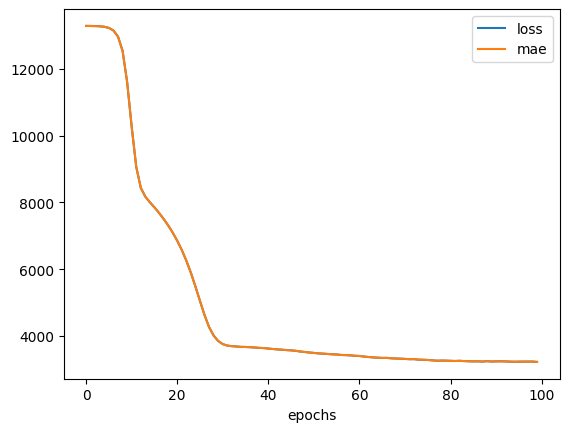

In [140]:
pd.DataFrame(history.history).plot()
plt.xlabel("loss")
plt.xlabel("epochs");


In [141]:
y_pred = insurance_model.predict(X_test_normal)
y_pred[121]

7/7 [==============================] - 0s 2ms/step


array([7264.708], dtype=float32)

In [142]:
y_test_tf = tf.constant(y_test)
y_test_tf[121]

<tf.Tensor: shape=(), dtype=float64, numpy=7261.741>

In [143]:
y_sub = y_test_tf - y_pred
print(y_sub)


tf.Tensor(
[[ 1.62597547e+02 -3.66029490e+03  2.03985124e+04 ... -6.73428085e+03
  -3.86703125e-01 -5.75618300e+03]
 [ 3.77688221e+03 -4.60102352e+01  2.40127971e+04 ... -3.11999619e+03
   3.61389796e+03 -2.14189834e+03]
 [-3.69319318e+04 -4.07548242e+04 -1.66960168e+04 ... -4.38288101e+04
  -3.70949160e+04 -4.28507123e+04]
 ...
 [ 7.18747194e+03  3.36457949e+03  2.74233868e+04 ...  2.90593537e+02
   7.02448769e+03  1.26869139e+03]
 [ 1.21124891e+02 -3.70176756e+03  2.03570398e+04 ... -6.77575351e+03
  -4.18593594e+01 -5.79765566e+03]
 [ 5.78514442e+03  1.96225197e+03  2.60210593e+04 ... -1.11173398e+03
   5.62216017e+03 -1.33636128e+02]], shape=(201, 201), dtype=float64)


In [122]:
insurance_model.evaluate(X_test_normal, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 2937.9727 - mae: 2937.9727


[2937.97265625, 2937.97265625]

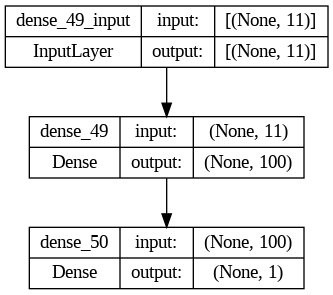

In [152]:
plot_model(insurance_model,show_shapes=True)

In [144]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [145]:
insurance_model.save("1st_model_for_insurance.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [146]:
!ls 1st_model_for_insurance.h5

1st_model_for_insurance.h5


In [147]:
from google.colab import files
files.download("1st_model_for_insurance.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

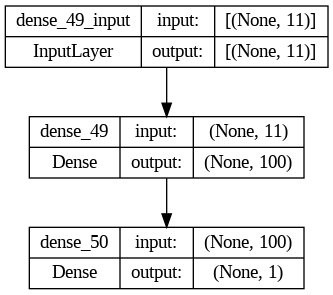

In [151]:
load_saved_model = tf.keras.models.load_model("1st_model_for_insurance.h5")
plot_model(load_saved_model,show_shapes=True)